<div class="alert alert-block alert-info" style="font-size:20px; background-color: #e0b1b1; font-family:verdana; color: #000000; border: 2px #e0b1b1 solid">
<b>Your first CNN pet-project with PyTorch 🐶🐈</b>
<br>Hi all 🙃<br>
Today we will plunge into the world of deep learning.Today we will solve problems of classification and try to train a convolutional neural network and embed it in a small pet project  
</div>

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c4aaf0; font-family:verdana; color: #000000; border: 2px #c4aaf0 solid">
- Let's imagine a situation when there are cameras in the habitat of animals
</div>



![](https://i.gifer.com/7KLY.gif)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c4aaf0; font-family:verdana; color: #000000; border: 2px #c4aaf0 solid">
- Cameras constantly shoot a lot of pictures that make up the video. Imagine now that it is important for us to analyze the fall or growth of some kind of animal using these cameras
</div>

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c4aaf0; font-family:verdana; color: #000000; border: 2px #c4aaf0 solid">
- It can take weeks for a person to do this
</div>



![](https://media.tenor.com/u94ffEgH-wYAAAAC/silicon-valley.gif)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c4aaf0; font-family:verdana; color: #000000; border: 2px #c4aaf0 solid">
- But we can embed a neural network that will classify the pictures and place pictures of animals in their own folders. Such an idea for a pet project is quite simple, but very interesting and even applicable in real life. You can develop this idea and come up with something more interesting. All in your hands!
</div>




![](https://i.pinimg.com/originals/f2/42/00/f24200fba88e0f9b1b2c564acdaecaea.gif)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c4aaf0; font-family:verdana; color: #000000; border: 2px #c4aaf0 solid">
- This is for your first pet project, so to make things easier for us, we will take a dataset with only 2 classes of cats and dogs
</div>

![](https://editor.analyticsvidhya.com/uploads/999181_BIpRgx5FsEMhr1k2EqBKFg.gif) 

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7ffdd; font-family:verdana; color: #000000; border: 2px #c7ffdd solid">
<b>Import Frameworks</b>
</div>

In [1]:
import numpy as np 
import pandas as pd  
import os
import torch
import torchvision
import torch.nn as nn 
import torchvision.datasets as datasets 
import torchvision.transforms as transforms 
import torch.nn.functional as F 
from torch.utils.data import DataLoader, Dataset 
from torchvision.datasets import ImageFolder
import torch.optim as optim 
from PIL import Image

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7ffdd; font-family:verdana; color: #000000; border: 2px #c7ffdd solid">
<b>Set device </b>
<br>use gpu or cpu<br>
</div>

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7ffdd; font-family:verdana; color: #000000; border: 2px #c7ffdd solid">
<b>Make Dataset</b>
<br>Split<br>
</div>

In [3]:
from sklearn.model_selection import train_test_split
dataset = ImageFolder("../input/cat-and-dog/training_set/training_set/")
train_data, test_data, train_label, test_label = train_test_split(dataset.imgs, dataset.targets, test_size=0.2, random_state=42)


class ImageLoader(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = self.checkChannel(dataset) # some images are CMYK, Grayscale, check only RGB 
        self.transform = transform
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, item):
        image = Image.open(self.dataset[item][0])
        classCategory = self.dataset[item][1]
        if self.transform:
            image = self.transform(image)
        return image, classCategory
        
    
    def checkChannel(self, dataset):
        datasetRGB = []
        for index in range(len(dataset)):
            if (Image.open(dataset[index][0]).getbands() == ("R", "G", "B")): # Check Channels
                datasetRGB.append(dataset[index])
        return datasetRGB

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7ffdd; font-family:verdana; color: #000000; border: 2px #c7ffdd solid">
<b>Transforms</b>
<br>Let's translate the pictures into tensors and deal with the augment<br>
</div>

In [4]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize([0.5]*3, [0.5]*3)
]) # train transform

test_transform = transforms.Compose([
    transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize([0.5]*3, [0.5]*3)
]) # test transform

train_dataset = ImageLoader(train_data, train_transform)
test_dataset = ImageLoader(test_data, test_transform)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7ffdd; font-family:verdana; color: #000000; border: 2px #c7ffdd solid">
<b>What is an augmentation? 🤔</b>
<br>This is one way to increase the variability of our data.<br>
<a href https://d2l.ai/chapter_computer-vision/image-augmentation.html >Read more here</a>
</div>

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7ffdd; font-family:verdana; color: #000000; border: 2px #c7ffdd solid">
<b>DataLoader</b>
<br>Combines a dataset and a sampler and provides an iteration over the given dataset. The DataLoader supports both map-style and iterable-style datasets with uniprocessor or multiprocessor loading, loading order customization, and optional automatic bagging (mapping) and memory pinning.<br>
</div> 

In [5]:
train_loader = DataLoader(train_dataset, batch_size=62, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=62, shuffle=True)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7ffdd; font-family:verdana; color: #000000; border: 2px #c7ffdd solid">
<b>How does a convolutional neural network work?</b>
    <br>You can find the answer in my notebook: <a href=https://www.kaggle.com/code/mersico/understanding-1d-2d-and-3d-convolution-network>Understanding 1D, 2D and 3D Convolution Neural Network</a><br>
</div> 



![](https://www.mobiquity.com/hs-fs/hubfs/CNN03.gif?width=640&name=CNN03.gif)

![](https://149695847.v2.pressablecdn.com/wp-content/uploads/2021/08/visual-transformers.gif)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7ffdd; font-family:verdana; color: #000000; border: 2px #c7ffdd solid">
<b>Resnet50</b>
<br>Transfer Learning Technique<br>
</div> 

![](https://www.researchgate.net/publication/362105276/figure/fig3/AS:1182532406116382@1658949104170/The-structure-of-the-backbone-based-on-Resnet-50-proposed-in-this-paper.png) 

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7ffdd; font-family:verdana; color: #000000; border: 2px #c7ffdd solid">
<b>Skip connections</b>
</div>



![](https://miro.medium.com/v2/resize:fit:1400/0*p2-45VuVWBJI-L_C.gif)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7ffdd; font-family:verdana; color: #000000; border: 2px #c7ffdd solid">
<br><b>Do not worry 🙃</b><br>
If you have a misunderstanding about this architecture, then this is normal. Just use third party sources.
<br>I will leave the link below to help you personally ⬇️⬇️⬇️<br>
<a href="https://www.mygreatlearning.com/blog/resnet/">Next work</a>
</div> 

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7ffdd; font-family:verdana; color: #000000; border: 2px #c7ffdd solid">
<b>Libraries</b>
</div> 

In [6]:
from tqdm import tqdm
from torchvision import models

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7ffdd; font-family:verdana; color: #000000; border: 2px #c7ffdd solid">
<b>Loading pretrained model</b>
</div> 

In [7]:
model = models.resnet50(pretrained=True)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7ffdd; font-family:verdana; color: #000000; border: 2px #c7ffdd solid">
<b>Trasnfer Learnig</b>
</div>

In [8]:
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


def train(num_epoch, model):
    for epoch in range(0, num_epoch):

        losses = []
        model.train()
        loop = tqdm(enumerate(train_loader), total=len(train_loader)) # create a progress bar
        for batch_idx, (data, targets) in loop:
            data = data.to(device=device)
            targets = targets.to(device=device)
            scores = model(data)
            
            loss = criterion(scores, targets)
            optimizer.zero_grad()
            losses.append(loss)
            loss.backward()
            optimizer.step()
            _, preds = torch.max(scores, 1)

            loop.set_description(f"Epoch {epoch+1}/{num_epoch} process: {int((batch_idx / len(train_loader)) * 100)}")
            loop.set_postfix(loss=loss.data.item())
        
     
        torch.save({ 
                    'model_state_dict': model.state_dict(), 
                    'optimizer_state_dict': optimizer.state_dict(), 
                    }, 'checpoint_epoch_'+str(epoch)+'.pt')

        
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device)
            output = model(x)
            _, predictions = torch.max(output, 1)
            correct += (predictions == y).sum().item()
            test_loss = criterion(output, y)
            
    test_loss /= len(test_loader.dataset)
    print("Average Loss: ", test_loss, "  Accuracy: ", correct, " / ",
    len(test_loader.dataset), "  ", int(correct / len(test_loader.dataset) * 100), "%")

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7ffdd; font-family:verdana; color: #000000; border: 2px #c7ffdd solid">
<b>Few details</b>
<br>CrossEntropy or other loss functions are divided by the number of elements, i.e. the default reduction setting is medium.<br>
torch.nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=-100, decrease=None, decrease='average')

<br>Therefore, loss.item() contains the loss of the entire mini-batch, but divided by the batch size. This is why loss.item() is multiplied by the batch size given by inputs.size(0) when calculating running_loss<br>
</div>


<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>Start training</b>
</div>



![](https://scitechdaily.com/images/AI-Technology-Creation-Concept.gif) 

In [10]:
if __name__ == "__main__":
    train(15, model) 
    test() 

Epoch 15/15 process: 99: 100%|██████████| 104/104 [00:45<00:00,  2.29it/s, loss=0.165]


Average Loss:  tensor(4.4010e-05, device='cuda:0')   Accuracy:  1558  /  1601    97 %


<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>Let's get everything ready to test our model in action</b>
</div>



![](https://media.tenor.com/uYP_Nkq8VPsAAAAC/coding-hello-world.gif)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>We still need libraries to work with the OS</b>
<br><br>
I'll do all the imports here so you can understand what I'm using even if it's already been imported
</div>

In [11]:
import os
from PIL.Image import new as pil_img_new
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import time
import shutil
from pathlib import Path
import random
from tqdm import tqdm

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>Load model from checkpoint</b>
</div>

In [12]:
checkpoint = torch.load("./checpoint_epoch_4.pt") 
model.load_state_dict(checkpoint["model_state_dict"]) 
print("----> Loading checkpoint")

----> Loading checkpoint


<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>Create a test data loader that the neural network has not seen</b>
</div>

In [13]:
dataset = ImageFolder("../input/cat-and-dog/test_set/test_set/", 
                     transform=transforms.Compose([
                         transforms.Resize((224, 224)), 
                         transforms.ToTensor(), 
                         transforms.Normalize([0.5]*3, [0.5]*3)
                     ]))
print(dataset)
dataloader = DataLoader(dataset, batch_size=1, shuffle = True)
len(dataloader)

Dataset ImageFolder
    Number of datapoints: 2023
    Root location: ../input/cat-and-dog/test_set/test_set/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )


2023

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>And now let's create functions for the work of our project 🐈🐶</b>
</div>

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>Convert tensor to image</b>
</div>

In [14]:
def convert_image(tensor_image) -> np.array:
    array_image = tensor_image.cpu().numpy().squeeze(axis=0)
    array_image = array_image.transpose(1, 2, 0)
    array_image = array_image.clip(0, 1)
    return array_image

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>Create folders</b>
</div>

In [15]:
def create_dir():
    path = os.getcwd() + "/Data"
    pathes = []
    if os.path.exists(path):
        shutil.rmtree(path)
    os.mkdir(path)
    for dir_path in tqdm(["/Cats", "/Dogs"]):
        class_path = path+dir_path
       
        os.mkdir(class_path)
        pathes.append(class_path)
    return {0:pathes[0],
            1:pathes[1]}

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>Randomly select photos from folders</b>
</div>

In [16]:
def dir_random_show(classes: str, dir: int):
    for i in range(2):
        dir_path = classes[dir]
        filename = random.choice(os.listdir(dir_path))
        img_path = f"/{filename}"
        path = dir_path+img_path
        label = path.split("/")[-2]
        with Image.open(path) as img:
            fig =  plt.figure(figsize=(8,8))
            plt.imshow(img)
            plt.title(label)
            plt.show() 

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>Test classification</b>
</div>

In [17]:
def make_classification():
    labels = {0:"Cat",
              1: "Dog"}

    with torch.no_grad():
        model.eval()
        
        for batch_idx, (data, targets) in tqdm(enumerate(dataloader)):
            
            data1, target1 = data.to(device), targets.to(device)
            output = model(data1)
            _, predicted = torch.max(output, 1)
           
            fig =  plt.figure(figsize=(8,8))
            plt.imshow(convert_image(data))
            plt.title(f"Predicted: {labels[predicted[0].item()]} Truth: {labels[predicted[0].item()]}")
            plt.show() 
            if batch_idx >= 6:
                print("End classification")
                break
                

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>Adding pictures to your class folders</b>
<br>In fact, these are the hands of our neural network<br>
</div>

In [18]:
def dir_appends(classes):
    with torch.no_grad():
        model.eval()
        for batch_idx, sample in tqdm(enumerate(dataloader)):
            data, _ = sample 
            data = data.to(device)
            output = model(data)
            _, predicted = torch.max(output, 1)
            path = classes[predicted[0].item()]
            Image.fromarray((convert_image(data)*255).astype('uint8'), mode="RGB").save(f'{path}/{batch_idx}.jpg')
            file = Path(f'{path}/{batch_idx}.jpg')
            file.touch(exist_ok=True)
        

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>Let's start testing our mini-project!</b>
</div>



![](https://giffiles.alphacoders.com/211/211159.gif)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>Let's see what animals got into our cameras to evaluate the work of the neural network</b>
</div>

0it [00:00, ?it/s]

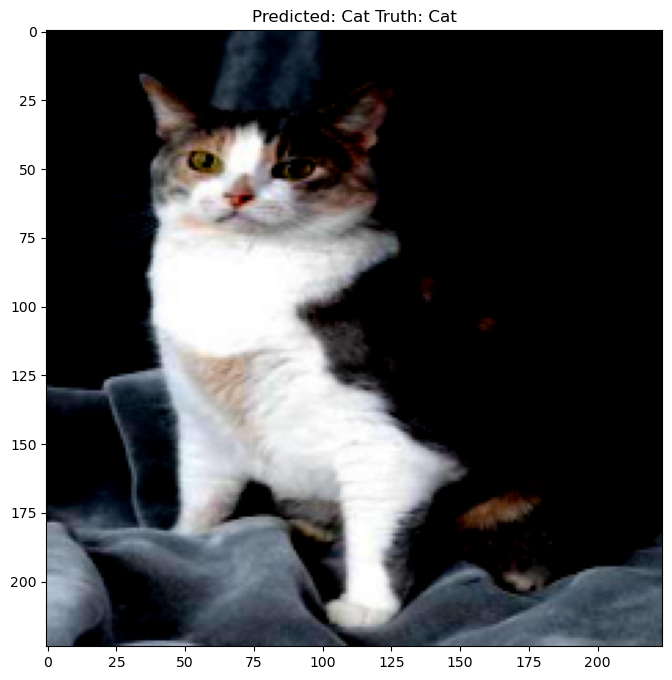

1it [00:00,  2.44it/s]

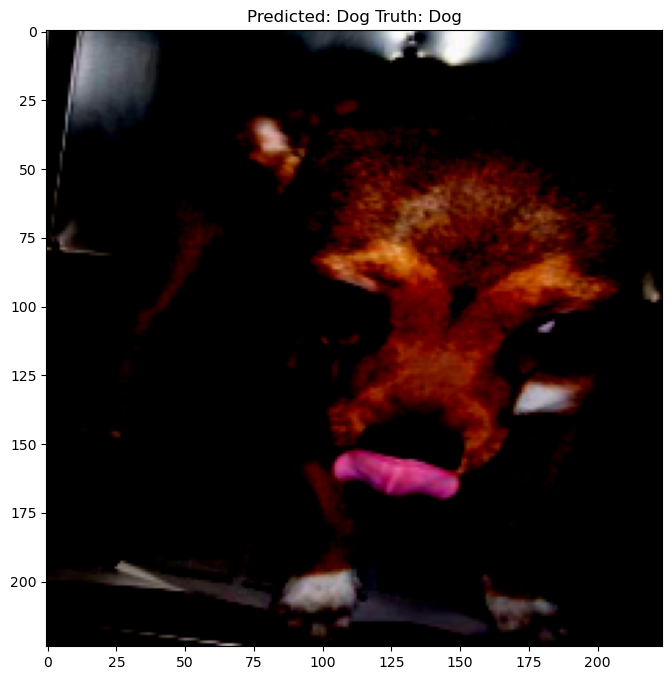

2it [00:00,  2.67it/s]

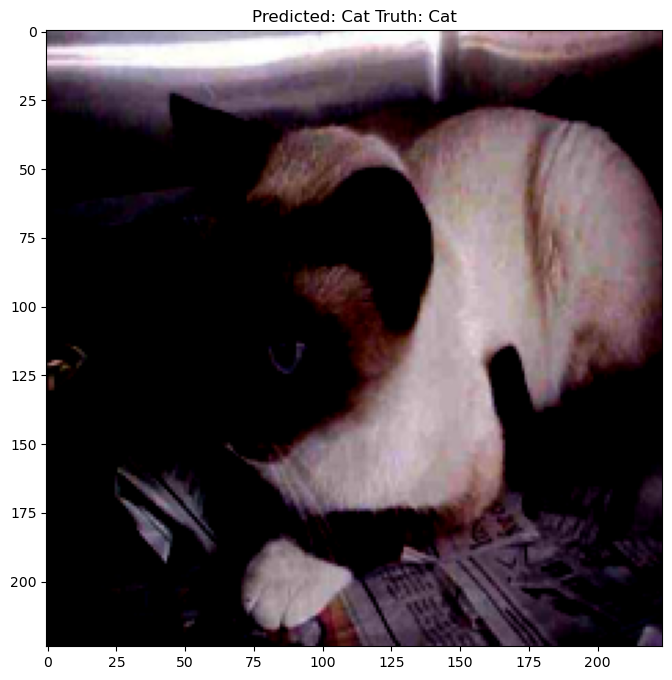

3it [00:01,  2.53it/s]

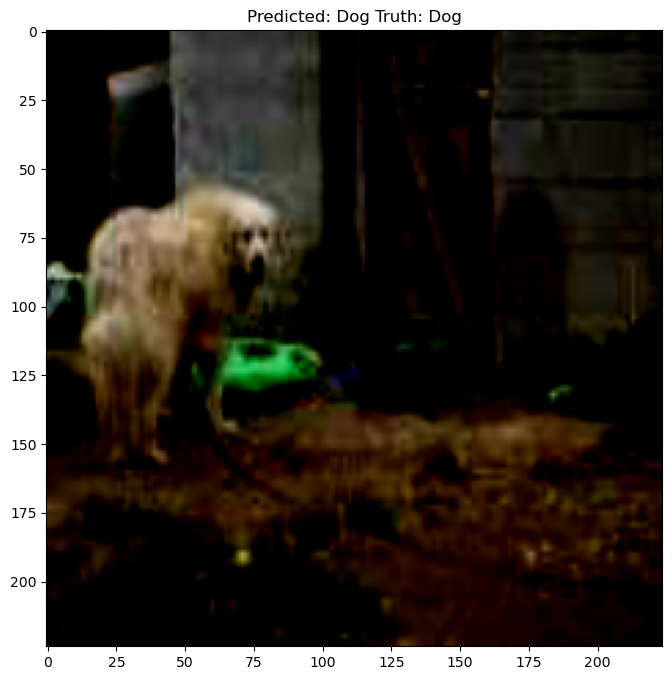

4it [00:01,  2.59it/s]

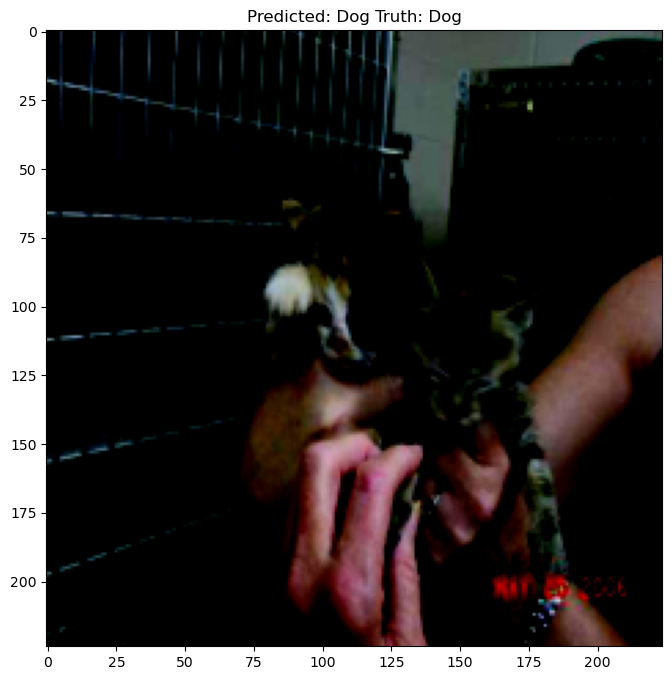

5it [00:01,  2.69it/s]

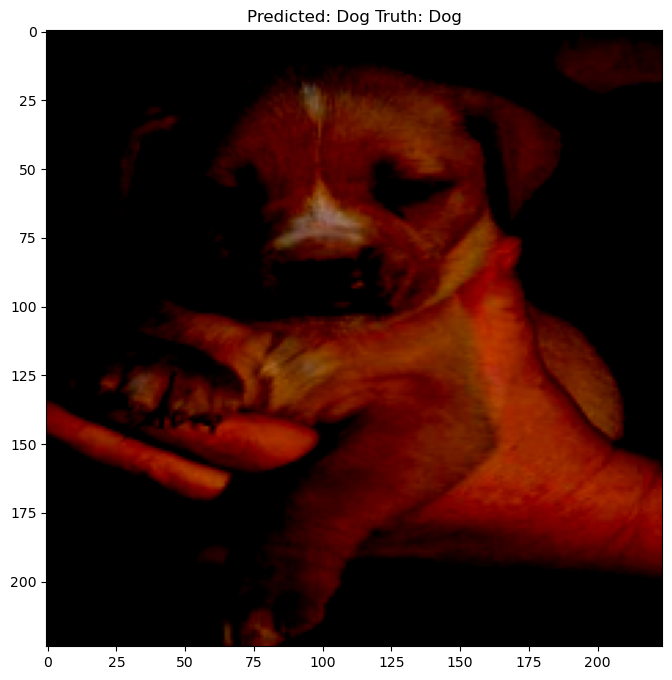

6it [00:02,  2.66it/s]

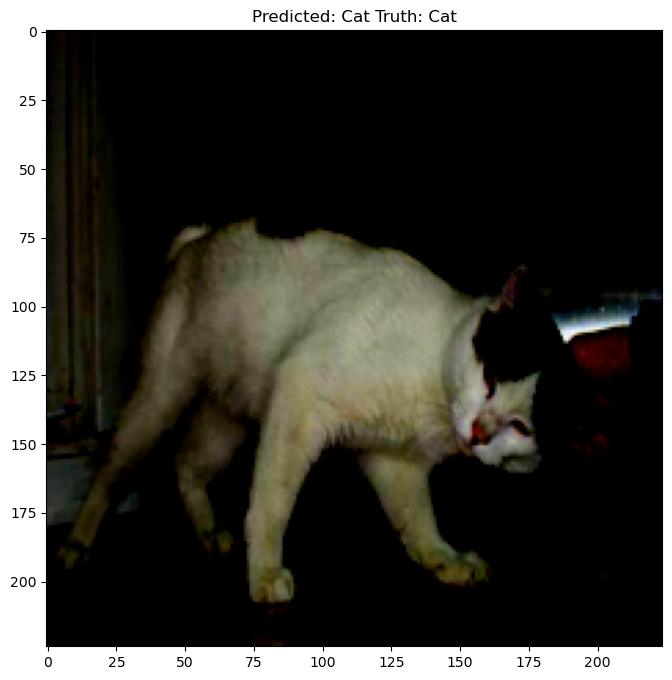

6it [00:02,  2.24it/s]

End classification


In [19]:
make_classification()

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>Create folders</b>
</div>

In [20]:
classes = create_dir()

100%|██████████| 2/2 [00:00<00:00, 8895.66it/s]


<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>And then we give the neural network access to the folders and observe</b>
</div>

In [21]:
dir_appends(classes)

2023it [00:41, 48.66it/s]


<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>Let's see how she did</b>
</div>



![](https://i.pinimg.com/originals/f7/90/15/f79015eb40067aed28ebf6f38a04a1d7.gif)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>Folder with cats</b>
</div>

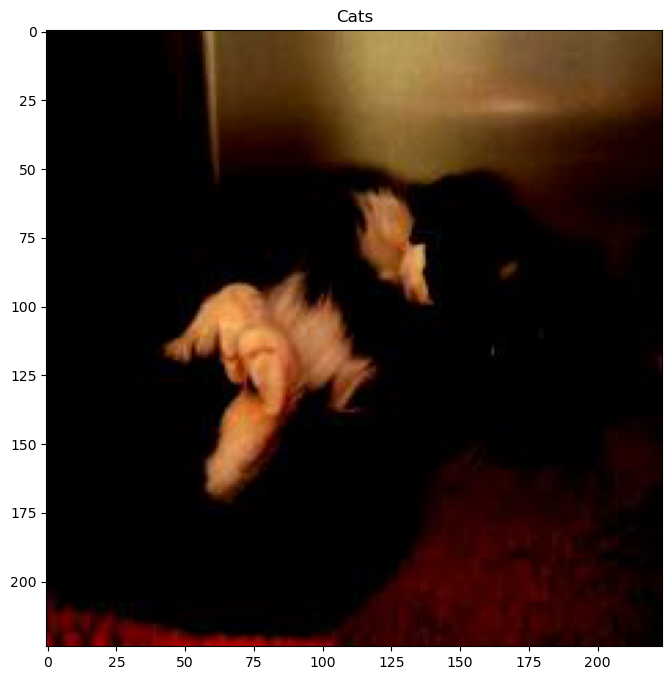

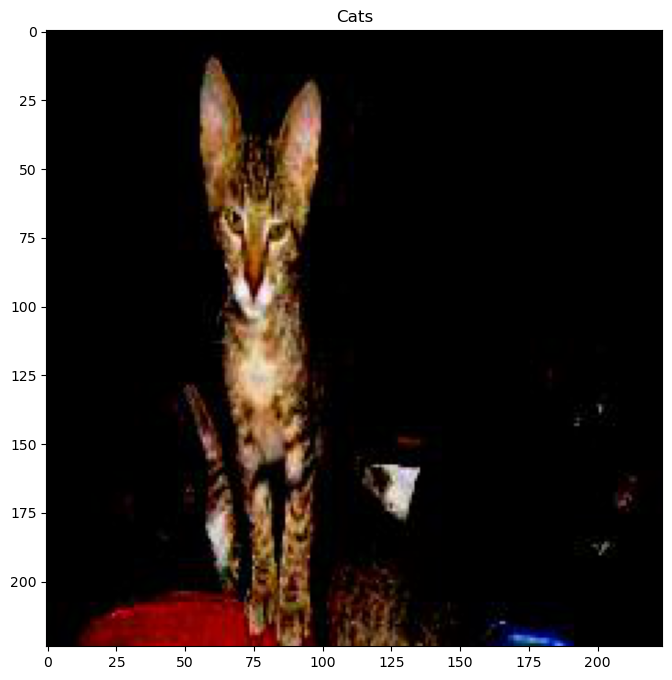

In [22]:
dir_random_show(classes, 0)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffe9c7; font-family:verdana; color: #000000; border: 2px #ffe9c7 solid">
<b>Folder with dogs</b>
</div>

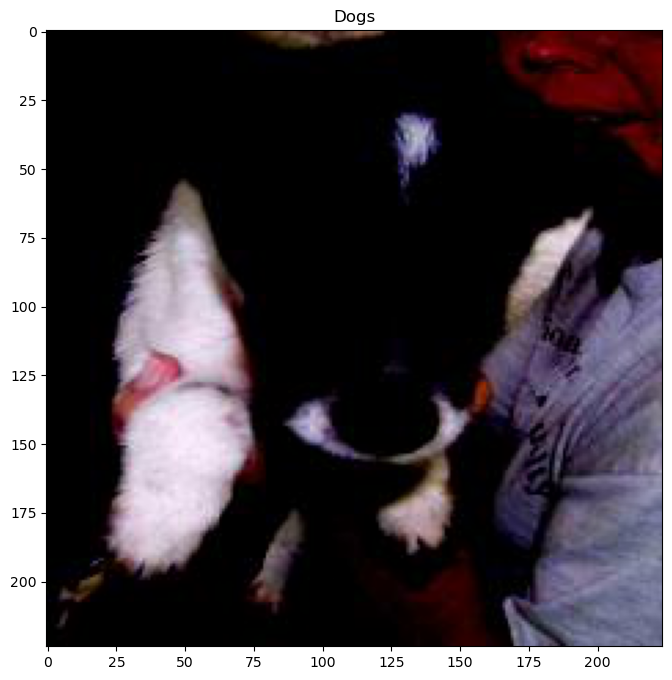

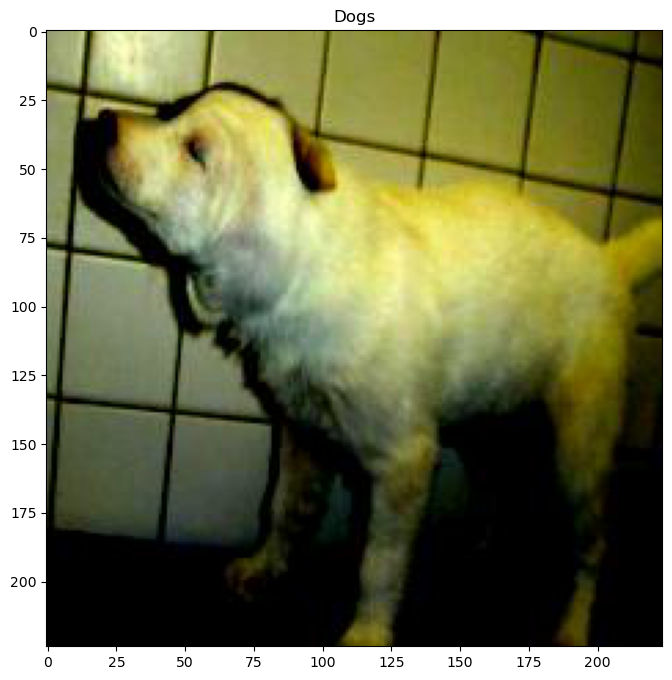

In [23]:
dir_random_show(classes, 1)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7f3ff; font-family:verdana; color: #000000; border: 2px #c7f3ff solid">
<b>Future of AI? What else are neural networks capable of?</b>
</div>



![](https://images.squarespace-cdn.com/content/v1/60479868292a5d29e69ac6b9/d2f479f8-2005-43ae-bb36-e90333fa8f19/Future_of_Artificial_Intelligence.gif?format=1000w) 

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7f3ff; font-family:verdana; color: #000000; border: 2px #c7f3ff solid">
Actually I think that deep learning is a relatively new and promising field.
<br>Below you can see a few more that neural networks are doing pretty well right now ⬇️⬇️⬇️<br>
</div>

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7f3ff; font-family:verdana; color: #000000; border: 2px #c7f3ff solid">
<b>Segmentation</b>
<ul style="font-size:20px; font-family:verdana; line-height: 1.7em">
    <li>In transport</li>
    <li>In medicine</li>
</ul>
</div>



![](https://lh6.googleusercontent.com/WTzh2AXq4sddwLfN6MnaXG4P_9Uip59VOSG8hwQJZ7FfLgSB3Kd8PJdtku8PYm5pGGCKu2vv1cJpkNaEpOCScAyRBHnBYrCkahxE1Ua6aly8XFPn0tfvkpDGTURZC234pJecAfGx2Fy-fWV1AU_GmPc) 

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #c7f3ff; font-family:verdana; color: #000000; border: 2px #c7f3ff solid">
<b>The end 👋</b>
<br>Thank you for walking this path, I hope that in addition to new knowledge, you were able to draw on the desire to learn more in this area. I hope you can learn something new in this work and I will be glad if you rate my other works 🙂<br>
    

<br>When creating this work, a person helped me a lot and I think that I should leave a link to it: 
    <a href="https://linktr.ee/aditta_das">Сool DataScientist</a>
    <br>
</div>



![](https://nypost.com/wp-content/uploads/sites/2/2019/12/keanu-13.gif)